In [1]:
# DataFrame
import pandas as pd

# Seaborn
import seaborn as sns

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import spacy

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
from collections import Counter
import time

In [2]:
#Importing Datasets
song_data = pd.read_csv('song_datas.csv')
lyric_data = pd.read_csv('lyrics-data.csv')
song_data

,name,release_date,total_tracks,artists,id,name.1,duration_ms,explicit,id.1,name.2,...,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,time_signature
0,...Ready For It?,2017-09-03,1.0,NaN,06HL4z0CvFAxyc27GXpf02,Taylor Swift,208198.0,False,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,...,0.0665,0.000000,0.1550,0.453,160.000,audio_features,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,4.0
1,Life Changes,2017-09-08,14.0,NaN,6x2LnllRG5uGarZMsD4iO8,Thomas Rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,...,0.1000,0.000000,0.0452,0.809,87.972,audio_features,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,4.0
2,24K Magic,2016-11-17,9.0,NaN,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,...,0.0340,0.000000,0.1530,0.632,106.970,audio_features,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,4.0
3,÷ (Deluxe),2017-03-03,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,...,0.0735,0.000000,0.3270,0.781,99.943,audio_features,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,4.0
4,x (Deluxe Edition),2014-06-21,16.0,NaN,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,...,0.6070,0.000464,0.0986,0.201,107.989,audio_features,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,NaN,NaN,NaN,NaN,4xRYI6VqpkE3UwrDrAZL8L,Logic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10875,NaN,NaN,NaN,NaN,6jsjhAEteAlY0vCiLvMLBA,ROZES,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10876,Tha Carter V,2018-09-28,23.0,NaN,55Aa2cqylxrFIXC767Z865,Lil Wayne,249450.0,True,5BQrp63SHCVf4bzCzJePne,Don't Cry (feat. XXXTENTACION),...,0.4070,0.000000,0.1830,0.233,112.014,audio_features,spotify:track:5BQrp63SHCVf4bzCzJePne,https://api.spotify.com/v1/tracks/5BQrp63SHCVf...,https://api.spotify.com/v1/audio-analysis/5BQr...,4.0
10877,NaN,NaN,NaN,NaN,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
lyric_data

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [4]:
song_data.info()
print('\nColumns in song_data:',song_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8958 non-null   object 
 1   release_date      8958 non-null   object 
 2   total_tracks      8958 non-null   float64
 3   artists           0 non-null      float64
 4   id                10879 non-null  object 
 5   name.1            10879 non-null  object 
 6   duration_ms       8958 non-null   float64
 7   explicit          8958 non-null   object 
 8   id.1              8958 non-null   object 
 9   name.2            8958 non-null   object 
 10  popularity        8958 non-null   float64
 11  danceability      8958 non-null   float64
 12  energy            8958 non-null   float64
 13  key               8958 non-null   float64
 14  loudness          8958 non-null   float64
 15  mode              8958 non-null   float64
 16  speechiness       8958 non-null   float6

In [5]:
lyric_data.info()
print('\nColumns in lyric_data:',lyric_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB

Columns in lyric_data: Index(['ALink', 'SName', 'SLink', 'Lyric', 'language'], dtype='object')


In [6]:
# Dropping uneccessary columns 
lyric_data = lyric_data.drop(['SLink'], axis = 1)

song_data = song_data.drop(['type', 'uri', 'track_href', 'analysis_url', 'artists', 'id'], axis = 1)

lyric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   Lyric     379854 non-null  object
 3   language  365296 non-null  object
dtypes: object(4)
memory usage: 11.6+ MB


In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8958 non-null   object 
 1   release_date      8958 non-null   object 
 2   total_tracks      8958 non-null   float64
 3   name.1            10879 non-null  object 
 4   duration_ms       8958 non-null   float64
 5   explicit          8958 non-null   object 
 6   id.1              8958 non-null   object 
 7   name.2            8958 non-null   object 
 8   popularity        8958 non-null   float64
 9   danceability      8958 non-null   float64
 10  energy            8958 non-null   float64
 11  key               8958 non-null   float64
 12  loudness          8958 non-null   float64
 13  mode              8958 non-null   float64
 14  speechiness       8958 non-null   float64
 15  acousticness      8958 non-null   float64
 16  instrumentalness  8958 non-null   float6

In [8]:
#Looking for null values in datasets
print('song_data:')
print(song_data.isnull().sum())
print('\n')
print('lyric_data:')
print(lyric_data.isnull().sum())

song_data:
name                1921
release_date        1921
total_tracks        1921
name.1                 0
duration_ms         1921
explicit            1921
id.1                1921
name.2              1921
popularity          1921
danceability        1921
energy              1921
key                 1921
loudness            1921
mode                1921
speechiness         1921
acousticness        1921
instrumentalness    1921
liveness            1921
valence             1921
tempo               1921
time_signature      1921
dtype: int64


lyric_data:
ALink           1
SName           3
Lyric          77
language    14635
dtype: int64


In [9]:
#Dropping NULL Values
song_data = song_data.dropna()
print(song_data.count())

name                8958
release_date        8958
total_tracks        8958
name.1              8958
duration_ms         8958
explicit            8958
id.1                8958
name.2              8958
popularity          8958
danceability        8958
energy              8958
key                 8958
loudness            8958
mode                8958
speechiness         8958
acousticness        8958
instrumentalness    8958
liveness            8958
valence             8958
tempo               8958
time_signature      8958
dtype: int64


In [10]:
#Dropping NULL Values
lyric_data = lyric_data.dropna()
print(lyric_data.count())

ALink       365294
SName       365294
Lyric       365294
language    365294
dtype: int64


In [11]:
#Looking for duplicates in each dataset
duplicate_rows_df = song_data[song_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (15, 21)


In [12]:
#Looking for duplicates in each dataset
duplicate_rows_df = lyric_data[lyric_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (3, 4)


In [13]:
#Dropping the duplicates
song_data = song_data.drop_duplicates()
print('song_data after removing duplicates:')
print(song_data.count())

song_data after removing duplicates:
name                8943
release_date        8943
total_tracks        8943
name.1              8943
duration_ms         8943
explicit            8943
id.1                8943
name.2              8943
popularity          8943
danceability        8943
energy              8943
key                 8943
loudness            8943
mode                8943
speechiness         8943
acousticness        8943
instrumentalness    8943
liveness            8943
valence             8943
tempo               8943
time_signature      8943
dtype: int64


In [14]:
#Dropping the duplicates
lyric_data = lyric_data.drop_duplicates()
print('lyric_data after removing duplicates:')
print(lyric_data.count())

lyric_data after removing duplicates:
ALink       365291
SName       365291
Lyric       365291
language    365291
dtype: int64


In [15]:
#Changing artist name in lyric data to match format in song_data
lyric_data['ALink'] = lyric_data['ALink'].str.replace('-',' ')
lyric_data['ALink'] = lyric_data['ALink'].str.replace('/','')
lyric_data

,ALink,SName,Lyric,language
0,ivete sangalo,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,ivete sangalo,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,ivete sangalo,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,ivete sangalo,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,ivete sangalo,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...
379926,clegg johnny,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,clegg johnny,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
379928,clegg johnny,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,clegg johnny,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [16]:
# Creating a temp df for song_data do that the song_name and artist_name match
temp_song = song_data
temp_song['name.1'] = temp_song['name.1'].str.lower()
temp_song.head(5)

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,...Ready For It?,2017-09-03,1.0,taylor swift,208198.0,False,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,0.0,0.615,...,2.0,-6.454,1.0,0.1350,0.0665,0.000000,0.1550,0.453,160.000,4.0
1,Life Changes,2017-09-08,14.0,thomas rhett,190227.0,False,4Vxu50qVrQcycjRyJQaZLC,Life Changes,67.0,0.687,...,7.0,-4.370,1.0,0.0576,0.1000,0.000000,0.0452,0.809,87.972,4.0
2,24K Magic,2016-11-17,9.0,bruno mars,225983.0,False,6b8Be6ljOzmkOmFslEb23P,24K Magic,83.0,0.818,...,1.0,-4.282,1.0,0.0797,0.0340,0.000000,0.1530,0.632,106.970,4.0
3,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,9.0,-3.374,1.0,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4.0
4,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,4.0,-10.480,1.0,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4.0


## Merging the datasets

In [17]:
#Using the Song id as the key for merging the datasets

data = temp_song.merge(lyric_data, left_on = ['name.2','name.1'], right_on = ['SName','ALink'],how='inner').drop(['SName','ALink'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 0 to 2418
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2419 non-null   object 
 1   release_date      2419 non-null   object 
 2   total_tracks      2419 non-null   float64
 3   name.1            2419 non-null   object 
 4   duration_ms       2419 non-null   float64
 5   explicit          2419 non-null   object 
 6   id.1              2419 non-null   object 
 7   name.2            2419 non-null   object 
 8   popularity        2419 non-null   float64
 9   danceability      2419 non-null   float64
 10  energy            2419 non-null   float64
 11  key               2419 non-null   float64
 12  loudness          2419 non-null   float64
 13  mode              2419 non-null   float64
 14  speechiness       2419 non-null   float64
 15  acousticness      2419 non-null   float64
 16  instrumentalness  2419 non-null   float64


In [18]:
data

,name,release_date,total_tracks,name.1,duration_ms,explicit,id.1,name.2,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Lyric,language
0,...Ready For It?,2017-09-03,1.0,taylor swift,208198.0,False,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,0.0,0.615,...,1.0,0.1350,0.06650,0.000000,0.1550,0.453,160.000,4.0,Knew he was a killer\nFirst time that I saw hi...,en
1,reputation,2017-11-10,15.0,taylor swift,208187.0,False,2yLa0QULdQr0qAIvVwN6B5,...Ready For It?,78.0,0.613,...,1.0,0.1360,0.05270,0.000000,0.1970,0.417,160.015,4.0,Knew he was a killer\nFirst time that I saw hi...,en
2,÷ (Deluxe),2017-03-03,16.0,ed sheeran,170827.0,False,0afhq8XCExXpqazXczTSve,Galway Girl,82.0,0.624,...,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,4.0,She played the fiddle in an Irish band\nBut sh...,en
3,x (Deluxe Edition),2014-06-21,16.0,ed sheeran,258987.0,False,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,88.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
4,x (Wembley Edition),2013,24.0,ed sheeran,258987.0,False,6fxVffaTuwjgEk5h9QyRjy,Photograph,69.0,0.614,...,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,4.0,Loving can hurt\nLoving can hurt sometimes\nBu...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,The Pains Of Growing,2018-11-30,15.0,alessia cara,208680.0,False,6qVwzCWDC6Kiatl7v2it7D,7 Days,47.0,0.503,...,0.0,0.1880,0.21400,0.000000,0.1650,0.798,79.157,4.0,If there's a God\nDo you think he's looking do...,en
2415,Doin' Time,2019-05-17,1.0,lana del rey,201997.0,True,0cLS7FslBJgsuWwJNRnPWB,Doin' Time,0.0,0.621,...,0.0,0.0435,0.33600,0.000458,0.0877,0.446,144.968,4.0,"Summertime, and the livin's easy\nBradley's on...",en
2416,MAP OF THE SOUL : PERSONA,2019-04-12,7.0,bts,249215.0,False,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,36.0,0.502,...,1.0,0.1070,0.04000,0.000000,0.3190,0.588,176.084,4.0,Jjuk deurikyeo\nsuljan sippin' paljjang tippin...,en
2417,You Never Walk Alone,2017-02-13,18.0,bts,231860.0,False,4hrpoqJMVE7FxBu1YWx0eQ,Not Today,33.0,0.594,...,1.0,0.1260,0.00181,0.000001,0.9230,0.665,110.024,4.0,All the underdogs in the world\nA day may come...,en


## Basic EDA

In [19]:
#making a new dataset with only numerical data
comp_data = data.select_dtypes(include=['float64','int64'])
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 0 to 2418
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_tracks      2419 non-null   float64
 1   duration_ms       2419 non-null   float64
 2   popularity        2419 non-null   float64
 3   danceability      2419 non-null   float64
 4   energy            2419 non-null   float64
 5   key               2419 non-null   float64
 6   loudness          2419 non-null   float64
 7   mode              2419 non-null   float64
 8   speechiness       2419 non-null   float64
 9   acousticness      2419 non-null   float64
 10  instrumentalness  2419 non-null   float64
 11  liveness          2419 non-null   float64
 12  valence           2419 non-null   float64
 13  tempo             2419 non-null   float64
 14  time_signature    2419 non-null   float64
dtypes: float64(15)
memory usage: 302.4 KB


,total_tracks,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
total_tracks,1.000000,-0.015605,0.003096,0.001235,-0.016830,0.013707,-0.076416,0.026512,0.006161,0.070420,-0.032477,0.034716,0.065340,-0.008139,-0.035078
duration_ms,-0.015605,1.000000,0.004418,-0.226325,-0.071103,-0.016234,-0.157686,-0.038808,-0.058965,-0.018584,0.171010,0.006405,-0.288171,-0.005878,-0.072607
popularity,0.003096,0.004418,1.000000,0.089135,0.032583,-0.023159,0.085310,0.020859,-0.002332,-0.061384,-0.114216,-0.013851,0.040131,-0.000003,0.043365
danceability,0.001235,-0.226325,0.089135,1.000000,-0.069985,0.015359,0.008490,-0.071675,0.073451,-0.025386,-0.154866,-0.062486,0.495910,-0.220449,0.147935
energy,-0.016830,-0.071103,0.032583,-0.069985,1.000000,0.006333,0.745810,-0.055988,0.136704,-0.695670,-0.022089,0.176583,0.281420,0.198847,0.162781
key,0.013707,-0.016234,-0.023159,0.015359,0.006333,1.000000,-0.013616,-0.159667,0.025060,-0.002764,-0.010843,0.018988,0.030624,-0.002673,-0.026904
loudness,-0.076416,-0.157686,0.085310,0.008490,0.745810,-0.013616,1.000000,-0.032573,0.082557,-0.588000,-0.160223,0.091220,0.173279,0.134225,0.115125
mode,0.026512,-0.038808,0.020859,-0.071675,-0.055988,-0.159667,-0.032573,1.000000,-0.092621,0.090645,-0.060455,-0.021896,-0.029592,-0.001655,-0.042374
speechiness,0.006161,-0.058965,-0.002332,0.073451,0.136704,0.025060,0.082557,-0.092621,1.000000,-0.088458,-0.020466,0.125643,0.087508,0.060089,0.070287
acousticness,0.070420,-0.018584,-0.061384,-0.025386,-0.695670,-0.002764,-0.588000,0.090645,-0.088458,1.000000,-0.000740,-0.097360,-0.165313,-0.152000,-0.144661


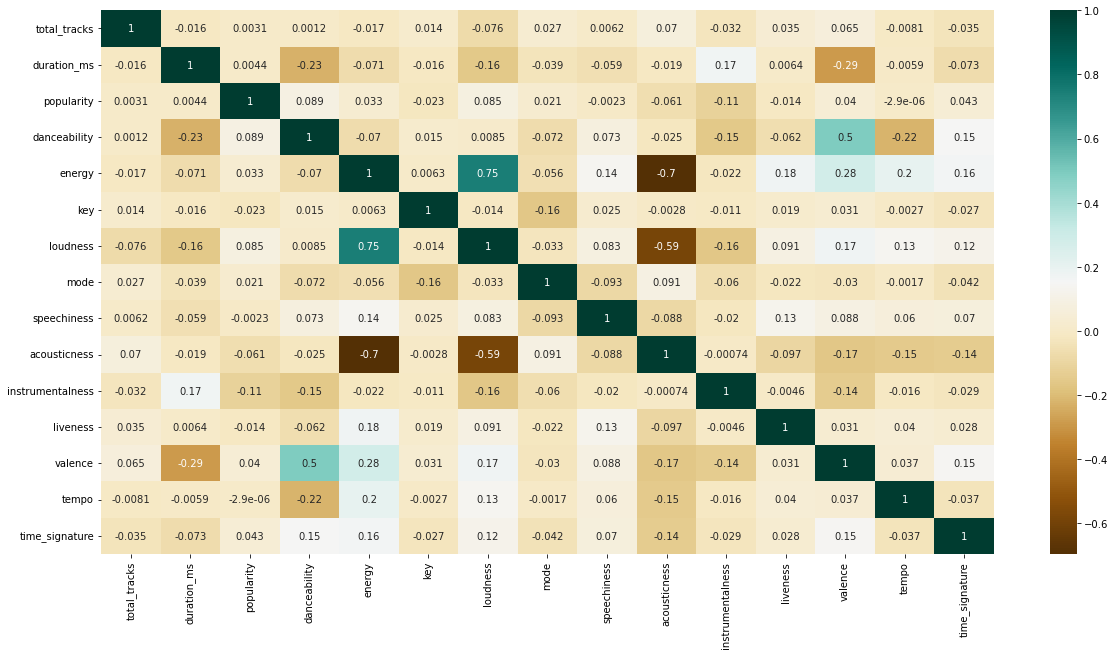

In [20]:
plt.figure(figsize=(20,10))
c = comp_data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c